In [1]:
import pandas as pd
import math
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/sckakani/Workspace/Classwork/cs5804/miniproject/I-66E_to_Glebe.csv", index_col = 0)


In [3]:
df = df.drop(index = df.query("Hour_Volume == '000-1'").index)
df = df.astype({'Hour_Volume':'int'})
df['DateTime'] = df.apply(lambda x : datetime(x['Year_Record'] + 2000, x['Month_Record'], x['Day_Record'], x['Hour_Record']), axis = 1)
df = df.set_index('DateTime')

In [4]:
df.head()

,Record_Type,State_Code,F_System,Station_Id,Travel_Dir,Travel_Lane,Year_Record,Month_Record,Day_Record,Day_of_Week,Hour_Record,Hour_Volume,Restrictions
DateTime,,,,,,,,,,,,,
2011-01-01 00:00:00,3,51,1U,90106,3,0,11,1,1,7,0,799,0
2011-01-01 01:00:00,3,51,1U,90106,3,0,11,1,1,7,1,1097,0
2011-01-01 02:00:00,3,51,1U,90106,3,0,11,1,1,7,2,762,0
2011-01-01 03:00:00,3,51,1U,90106,3,0,11,1,1,7,3,465,0
2011-01-01 04:00:00,3,51,1U,90106,3,0,11,1,1,7,4,342,0


In [5]:
# X = df.drop(['Record_Type', 'State_Code', 'F_System', 'Station_Id', 'Travel_Dir', 'Travel_Lane', 'Restrictions', 'Hour_Volume'], axis=1)

# y = df['Hour_Volume']
training = df.query("Year_Record < 22")
testing = df.query("Year_Record >= 22")

In [6]:
from sklearn.model_selection import train_test_split
X_train = training.drop(['Record_Type', 'State_Code', 'F_System', 'Station_Id', 'Travel_Dir', 'Travel_Lane', 'Restrictions', 'Hour_Volume'], axis=1)

y_train = training['Hour_Volume']

X_test = testing.drop(['Record_Type', 'State_Code', 'F_System', 'Station_Id', 'Travel_Dir', 'Travel_Lane', 'Restrictions', 'Hour_Volume'], axis=1)

y_test = testing['Hour_Volume']

In [7]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators= 900, min_samples_split= 5, min_samples_leaf= 1, max_features= 'log2', max_depth= 100, bootstrap= True)

In [8]:
rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features='log2', min_samples_split=5,
                      n_estimators=900)

In [9]:
# y_pred = rfr.predict(X_val)
# from sklearn.metrics import mean_squared_error
# print( math.sqrt(mean_squared_error(y_val, y_pred)))

In [10]:
y_pred = rfr.predict(X_train)
from sklearn.metrics import mean_squared_error
print( math.sqrt(mean_squared_error(y_train, y_pred)))

110.27496800277751


In [11]:
y_pred = rfr.predict(X_test)
from sklearn.metrics import mean_squared_error
print( math.sqrt(mean_squared_error(y_test, y_pred)))

428.4677343384141


In [12]:
print(rfr.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 100, 'max_features': 'log2', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 900, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


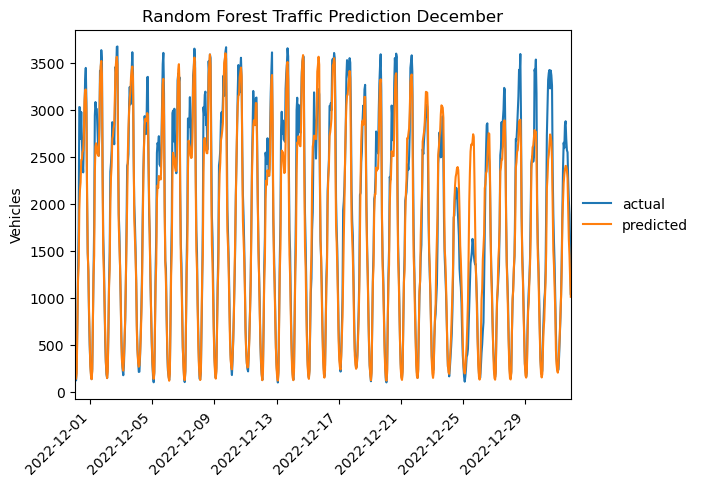

In [13]:
pts = 768

x_data = testing.tail(pts).index

plt.plot(x_data, y_test[-pts:], label = 'actual')
plt.plot(x_data, y_pred[-pts:], label = 'predicted')
plt.xticks(rotation = 45, ha = 'right')

plt.ylabel("Vehicles")
plt.xlim(left = min(x_data), right = max(x_data))
plt.title("Random Forest Traffic Prediction December")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon = False)

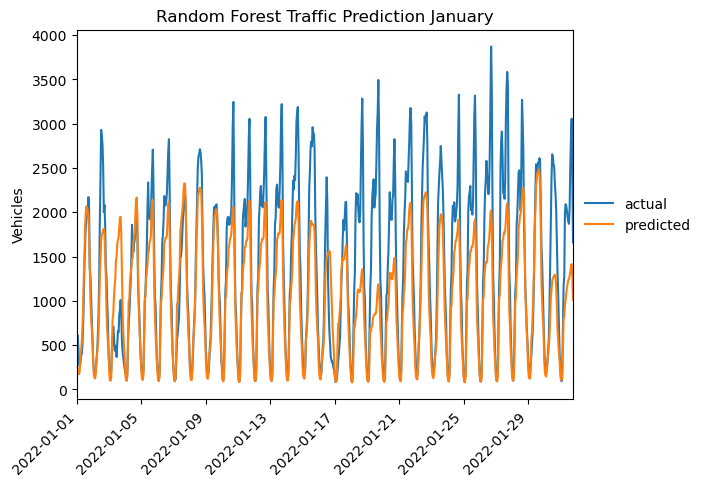

In [14]:
pts = 740

x_data = testing.head(pts).index

plt.plot(x_data, y_test[:pts], label = 'actual')
plt.plot(x_data, y_pred[:pts], label = 'predicted')
plt.xticks(rotation = 45, ha = 'right')

plt.ylabel("Vehicles")
plt.xlim(left = min(x_data), right = max(x_data))
plt.title("Random Forest Traffic Prediction January")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), frameon = False)